In [1]:
import json
with open('data/valor32k/descs_cap_test.json') as f:
    valor_test = json.load(f)

In [2]:
len(valor_test)

3491

In [3]:
subtitle_len = []
for entry in valor_test:
    subtitle_len.append(len(entry['subtitle']))

22.0 43.5 78.75


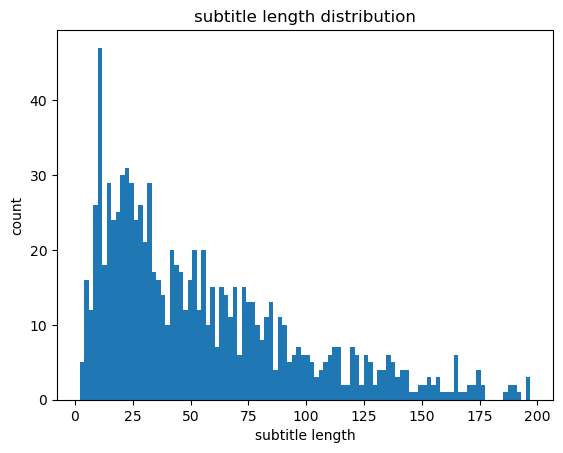

Text(0.5, 1.0, 'subtitle length box chart')

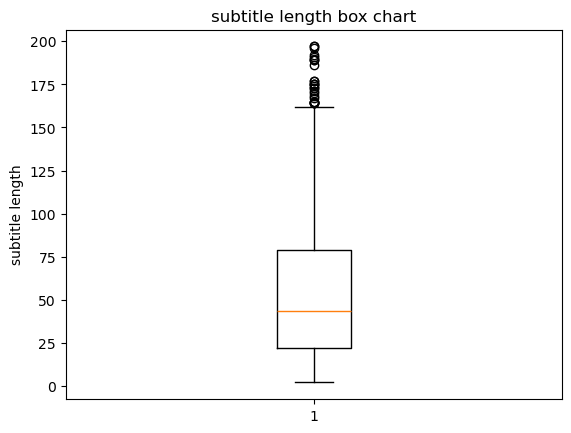

In [5]:
import numpy as np

subtitle_len = np.array(subtitle_len)
# filter , remove subtitle length > 200
subtitle_len = subtitle_len[subtitle_len < 200]
subtitle_len = subtitle_len[subtitle_len > 0]
mean = np.mean(subtitle_len)
median = np.median(subtitle_len)
max_len = np.max(subtitle_len)
min_len = np.min(subtitle_len)
std = np.std(subtitle_len)
# calculate IQR
Q1 = np.percentile(subtitle_len, 25)
Q3 = np.percentile(subtitle_len, 75)
IQR = Q3 - Q1
print(Q1, median, Q3)

import matplotlib.pyplot as plt
plt.hist(subtitle_len, bins=100)
plt.xlabel('subtitle length')
plt.ylabel('count')
plt.title('subtitle length distribution')
plt.show()

# plot box chart
plt.boxplot(subtitle_len)
plt.ylabel('subtitle length')
plt.title('subtitle length box chart')

In [6]:
subtitle_none = []
subtitle_short = []
subtitle_long = []
subtitle_long_long = []

for entry in valor_test:
    if entry['subtitle'] == '':
        subtitle_none.append(entry)
    elif len(entry['subtitle']) > 22 and len(entry['subtitle']) < 43:
        subtitle_short.append(entry)
    elif len(entry['subtitle']) > 43 and len(entry['subtitle']) < 78:
        subtitle_long.append(entry)
    elif len(entry['subtitle']) > 78:
        subtitle_long_long.append(entry)


In [7]:
len(subtitle_none)

2519

In [8]:
len(subtitle_short)

223

In [9]:
len(subtitle_long)

233

In [10]:
len(subtitle_long_long)

254

In [34]:
import random

# construct a sample dataset with haf of subtitle_none and subtitle_not_none
random.seed(0)
subtitle_none_sample = random.sample(subtitle_none, 60)
subtitle_short_sample = random.sample(subtitle_short, 20)
subtitle_long_sample = random.sample(subtitle_long, 20)
subtitle_long_long_sample = random.sample(subtitle_long_long, 20)


In [58]:
valor_sample_test_120 = subtitle_none_sample + subtitle_short_sample + subtitle_long_sample + subtitle_long_long_sample

In [60]:
with open('sample_v_nv_test120_new.json', 'w') as file:
    json.dump(valor_sample_test_120, file, indent=4)


----

In [ ]:
pip install yt-dlp

In [ ]:
brew install ffmpeg

----

### Pipeline to Verify and Download YouTube Videos

This pipeline will process the sampled JSON file, check the accessibility of each YouTube video, and download it. If a video is not accessible or cannot be downloaded, it will be replaced with another video until a successful download is achieved.

#### Steps:
1. **Load the Sample JSON File**: Read the JSON file containing the sampled data.
2. **Check Video Accessibility**: For each video in the JSON file, check if the video is accessible.
3. **Download Video**: Attempt to download the accessible video.
4. **Replace Unavailable Videos**: If a video is not accessible or cannot be downloaded, replace it with another video and repeat the process until a successful download is achieved.


In [50]:
# import json
# import os
# with open('data/sample_v_nv_test120_new.json') as file:
#     sample_data = json.load(file)

# def check_and_download(video_id):
    
#     parts = video_id.split('_')
#     youtube_id = '_'.join(parts[0:-2])

#     if os.path.exists(f'data/1003_120/{youtube_id}.mp4'):
#         print(f'Video clip {video_id} already exists.')
#         return True

#     start_time = float(parts[-2])
#     end_time = float(parts[-1])
#     youtube_url = f'https://www.youtube.com/watch?v={youtube_id}'
    
#     ydl_opts = {
#         'outtmpl': f'data/1003_120/{youtube_id}.%(ext)s',
#     }

#     try:
#         with yt_dlp.YoutubeDL(ydl_opts) as ydl:
#             ydl.download([youtube_url])
        
#         # if not .mp4, return False
#         if not os.path.exists(f'data/1003_120/{youtube_id}.mp4'):
#             print(f'Video {video_id} not mp4 downloading')
#             return False
        
#         input_file = f'data/1003_120/{youtube_id}.mp4'
#         output_file = f'data/1003_120_new/{video_id}.mp4'
#         duration = end_time - start_time
        
#         subprocess.run([
#             'ffmpeg', '-i', input_file, '-ss', str(start_time), '-t', str(duration), '-c:v', 'copy', '-c:a', 'copy', output_file
#         ])
        
#         print(f'Video {output_file} downloaded and trimmed successfully.')
#         return True
#     except Exception as e:
#         print(f'Video {video_id} fails downloading: {e}')
#         return False


In [ ]:
# # Check each video in the sample data
# import random
# for entry in sample_data:
#     video_id = entry['video_id']
#     if not check_and_download(video_id):
#         # If (not .mp4 OR not accessible) => Replace the video with another one from the dataset
#         while True:
#             subtilte_len = -1
#             for ori_entry in valor_test:
#                 if ori_entry['video_id'] == video_id:
#                     subtitle_len = len(ori_entry['subtitle'])
#                     break
#             if subtitle_len == 0:
#                 new_entry = random.choice(subtitle_none)
#             elif subtitle_len > 0 and subtitle_len < 22:
#                 new_entry = random.choice(subtitle_short)
#             elif subtitle_len > 22 and subtitle_len < 43:
#                 new_entry = random.choice(subtitle_long)
#             elif subtitle_len > 43:
#                 new_entry = random.choice(subtitle_long_long)
#             new_video_id = new_entry['video_id']
#             if check_and_download(new_video_id):
#                 entry['video_id'] = new_video_id
#                 break


In [54]:
# with open('/Users/yaqi/cmu/course/11777 mutlimodal/sample_v_nv_test120_new.json', 'w') as file:
#     json.dump(sample_data, file, indent=4)